In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median


import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("2019_partnerships_ipl.csv")
df.head()


,index,team,player_1,player_2,score_1,score_2
0,0,Chennai Super Kings,AT Rayudu,SR Watson,7,0
1,1,Chennai Super Kings,AT Rayudu,SK Raina,12,19
2,2,Chennai Super Kings,AT Rayudu,KM Jadhav,9,9
3,3,Chennai Super Kings,RA Jadeja,KM Jadhav,6,4
4,19,Sunrisers Hyderabad,DA Warner,JM Bairstow,74,39


In [ ]:

df_dc = df[df['team']=="Sunrisers Hyderabad"]

df_dc['partners'] = [sorted([i,j]) for i,j in zip(df_dc['player_1'], df_dc['player_2'])]
df_dc['partnership'] = ["".join(i) for i in df_dc['partners']]

df_dc.head()

,index,team,player_1,player_2,score_1,score_2,partners,partnership
4,19,Sunrisers Hyderabad,DA Warner,JM Bairstow,74,39,"[DA Warner, JM Bairstow]",DA WarnerJM Bairstow
5,20,Sunrisers Hyderabad,DA Warner,V Shankar,11,14,"[DA Warner, V Shankar]",DA WarnerV Shankar
6,21,Sunrisers Hyderabad,YK Pathan,V Shankar,1,6,"[V Shankar, YK Pathan]",V ShankarYK Pathan
7,22,Sunrisers Hyderabad,MK Pandey,V Shankar,8,20,"[MK Pandey, V Shankar]",MK PandeyV Shankar
45,91,Sunrisers Hyderabad,DA Warner,JM Bairstow,69,39,"[DA Warner, JM Bairstow]",DA WarnerJM Bairstow


In [ ]:

p1 = []
p2 = []

r1 = []
r2 = []

for p in df_dc['partnership'].unique():
    
    temp = df_dc[df_dc['partnership'] == p]
    p1.append(temp.iloc[0]['player_1'])
    p2.append(temp.iloc[0]['player_2'])
    
    a = []
    b = []

    for index, row in temp.iterrows():

        a.append(row['score_1'])
        

        b.append(row['score_2'])

     
    r1.append(median(a))
    r2.append(median(b))

In [ ]:

team_df = pd.DataFrame({'p1':p1, 'p2':p2, 'r1':r1, 'r2':r2})
team_df.head()


,p1,p2,r1,r2
0,DA Warner,JM Bairstow,39.5,39.0
1,DA Warner,V Shankar,6.0,5.0
2,YK Pathan,V Shankar,1.0,6.0
3,MK Pandey,V Shankar,10.0,12.0
4,KS Williamson,JM Bairstow,3.0,6.0


In [ ]:

team_df['lead'] = np.where(team_df['r1'] >= team_df['r2'], team_df['p1'], team_df['p2'])
team_df['follower'] = np.where(team_df['lead'] == team_df['p1'], team_df['p2'], team_df['p1'])
team_df['larger_score'] = np.where(team_df['r1'] >= team_df['r2'], team_df['r1'], team_df['r2'])
team_df['total_score'] = team_df['r1'] + team_df['r2']

team_df['performance'] = team_df['larger_score']/(team_df['total_score']+0.01)

In [ ]:

G = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

_, wt = zip(*nx.get_edge_attributes(G, 'performance').items())

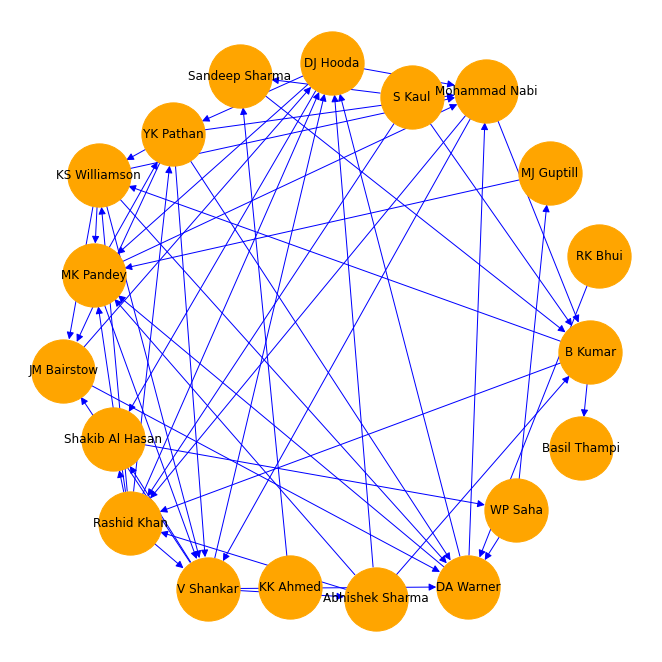

In [ ]:

plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k = 20, seed = 21) 
nx.draw(G, with_labels=True, node_color='orange', node_size=4000, pos = pos, edgelist=G.edges(), edge_color='b', arrowsize=15)
plt.show()

In [ ]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('V Shankar', 10),
 ('Rashid Khan', 10),
 ('DA Warner', 9),
 ('MK Pandey', 9),
 ('DJ Hooda', 9),
 ('YK Pathan', 8),
 ('KS Williamson', 8),
 ('Mohammad Nabi', 8),
 ('B Kumar', 7),
 ('JM Bairstow', 5),
 ('Abhishek Sharma', 5),
 ('Shakib Al Hasan', 4),
 ('S Kaul', 3),
 ('Sandeep Sharma', 3),
 ('WP Saha', 3),
 ('MJ Guptill', 2),
 ('RK Bhui', 1),
 ('KK Ahmed', 1),
 ('Basil Thampi', 1)]

In [ ]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)

[('DA Warner', 6),
 ('MK Pandey', 6),
 ('V Shankar', 5),
 ('DJ Hooda', 5),
 ('Mohammad Nabi', 5),
 ('Rashid Khan', 4),
 ('B Kumar', 4),
 ('JM Bairstow', 3),
 ('YK Pathan', 3),
 ('KS Williamson', 3),
 ('Shakib Al Hasan', 3),
 ('Sandeep Sharma', 2),
 ('Abhishek Sharma', 1),
 ('WP Saha', 1),
 ('MJ Guptill', 1),
 ('Basil Thampi', 1),
 ('S Kaul', 0),
 ('RK Bhui', 0),
 ('KK Ahmed', 0)]

In [ ]:
sorted(G.out_degree, key=lambda x: x[1], reverse=True)

[('Rashid Khan', 6),
 ('V Shankar', 5),
 ('YK Pathan', 5),
 ('KS Williamson', 5),
 ('DJ Hooda', 4),
 ('Abhishek Sharma', 4),
 ('DA Warner', 3),
 ('MK Pandey', 3),
 ('Mohammad Nabi', 3),
 ('B Kumar', 3),
 ('S Kaul', 3),
 ('JM Bairstow', 2),
 ('WP Saha', 2),
 ('Sandeep Sharma', 1),
 ('RK Bhui', 1),
 ('KK Ahmed', 1),
 ('Shakib Al Hasan', 1),
 ('MJ Guptill', 1),
 ('Basil Thampi', 0)]